In [31]:
from tweet import *
from candidate import *
import pandas as pd
import numpy as np
import tweepy
import json
import calendar
import datetime
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time

In [2]:
#TODO: Fill this in

consumer_key = "BeC8UJbqCHyX6pTWAvEvvIcGJ"
consumer_secret = "IwEzqplLUKar6MFZ7l828tLbEpxG3ObD49llOSPJ6Y6phKzVYT"
access_token = "727703646331240448-31ZFnJzKYfDcHh3HIgBhd1FfU3W7VaO"
access_token_secret = "GprFSIZ18ukkn9lZb7INfEn78miwkXzWpkzyJ6ocLAg6J"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
month_abbrs = dict((v,k) for k,v in enumerate(calendar.month_abbr))

most_recent_rankings = ['bennet',
                         'castro',
                         'booker',
                         'klobuchar',
                         'gabbard',
                         'yang',
                         'harris',
                         'buttigieg',
                         'warren',
                         'sanders',
                         'biden']

last_name_to_handle = {'bennet': 'MichaelBennet',
                         'castro': 'JulianCastro',
                         'booker': 'CoryBooker',
                         'klobuchar': 'amyklobuchar',
                         'gabbard': 'TulsiGabbard',
                         'yang': 'AndrewYang',
                         'harris': 'KamalaHarris',
                         'buttigieg': 'PeteButtigieg',
                         'warren': 'ewarren',
                         'sanders': 'BernieSanders',
                         'biden': 'JoeBiden'}

handle_to_last_name = {}
for i in last_name_to_handle:
    handle_to_last_name[i] = last_name_to_handle[i]

In [4]:
def get_tweet_time(time_str):
    global month_abbrs
    time_lst = time_str.split(" ")
    year = int(time_lst[-1])
    day = int(time_lst[2])
    month = month_abbrs[time_lst[1]]
    return datetime.date(year, month, day)    

In [33]:
startDate =   datetime.datetime(2019, 9, 13, 0, 0, 0)
# startDate =   datetime.datetime(2019, 11, 1, 0, 0, 0)
endDate = datetime.datetime(2019, 11, 16, 0, 0, 0)
tweets = {}
cand_handles = ['AndrewYang', 'ewarren', 'PeteButtigieg', 'BernieSanders', 
                'MichaelBennet', 'amyklobuchar', 'KamalaHarris', 'TulsiGabbard', 
                'JulianCastro', 'CoryBooker', 'JoeBiden']

for cand_name in cand_handles:
    print(cand_name)
    cand_tweets = []
    tweets[cand_name] = cand_tweets
    try:
        tmpTweets = api.user_timeline(cand_name, tweet_mode='extended')
    except tweepy.TweepError:
        print("tweepyError 2")
        time.sleep(60 * 15)
        continue
    except StopIteration:
        break
    for t in tmpTweets:
        if t.created_at < endDate and t.created_at > startDate:
            cand_tweets.append(t)
    if len(cand_tweets) > 0:
        print(cand_tweets)
    try:
        while (tmpTweets[-1].created_at > startDate):
            tmpTweets = api.user_timeline(cand_name, max_id = tmpTweets[-1].id, tweet_mode='extended')
            for ti in tmpTweets:
                if ti.created_at < endDate and ti.created_at > startDate:
                    t = ti._json
                    tw_obj = Tweet(t['full_text'], get_tweet_time(t['created_at']), cand_name)
                    if 'media' in t['entities']:
                        tw_obj.contains_media()
                    if len(t['entities']['urls']) > 0:
                        tw_obj.contains_link()
                    if t['in_reply_to_screen_name'] and t['in_reply_to_screen_name'] != cand_name:
                        tw_obj.is_response()
                    cand_tweets.append(tw_obj)
    except tweepy.TweepError:
        time.sleep(60 * 15)
        print("tweepyError 2")
        continue
    except:
        print(len(cand_tweets))
        print(len(tmpTweets))

AndrewYang
ewarren
PeteButtigieg
BernieSanders
MichaelBennet
amyklobuchar
KamalaHarris
TulsiGabbard
JulianCastro
CoryBooker
JoeBiden


In [ ]:

warren_tweets = tweets['ewarren']
print(len(tweets['ewarren']))
zzzzzzzzzzz = 0
for i in range(len(warren_tweets)):
    if (warren_tweets[i]._clean_text).count(" ") > 25:
        print(warren_tweets[i]._raw_text)
        print(warren_tweets[i].get_sentiment()[0])
        
        zzzzzzzzzzz += 1
print(zzzzzzzzzzz)

In [35]:
def avg_sentiment(cand):
    global tweets
    cand_t = tweets[cand]
    sent_sum = float(0)
    num_counted = float(0)
    for i in range(len(cand_t)):
        if (cand_t[i]._clean_text).count(" ") > 29:
            sent_sum += cand_t[i].get_sentiment()[0]
            num_counted += 1
    return sent_sum/num_counted

cand_sentiments = {}
sentiment_nums = []
for i in tweets:
    sent = avg_sentiment(i)
    cand_sentiments[i] = sent
    sentiment_nums.append(sent)

In [36]:
cand_sentiments

sentiment_nums

[0.12942987567987568,
 0.048031681368945534,
 0.02618614718614718,
 0.08256354359925787,
 0.08728715728715729,
 0.2035815844783236,
 0.004565217391304345,
 0.11700396825396825,
 0.06059684281236006,
 0.10876645923520925,
 0.003640196608946611]

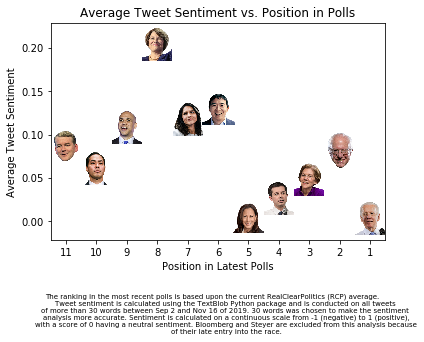

In [76]:
def getImage(path):
    if path == 'images/sanders.png':
        return OffsetImage(plt.imread(path), zoom = 0.03, interpolation='gaussian')
    elif path == 'images/bennet.png':
        return OffsetImage(plt.imread(path), zoom = 0.08, interpolation='gaussian')
    else:
        return OffsetImage(plt.imread(path), zoom = 0.1, interpolation='gaussian')

paths = ['images/bennet.png',
        'images/biden.png',
        'images/booker.png',
        'images/buttigieg.png',
        'images/castro.png',
        'images/gabbard.png',
        'images/harris.png',
        'images/klobuchar.png',
        'images/sanders.png',
        'images/warren.png',
        'images/yang.png']

x = [i+1 for i in range(len(paths))]
y = sentiment_nums
# x = [0,1,2,3,4]
# y = [0,1,2,3,4]

fig, ax = plt.subplots()
ax.scatter(x, y, color = "white")
plt.xticks(np.arange(1, len(paths)+1, 1), np.arange(len(paths), 0, -1))
y = []

# for x0, y0, path in zip(x, y,paths):
for i in range(len(paths)):
    candidate_name = most_recent_rankings[i]
    path_name = "images/" + candidate_name + ".png"
#     ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False) # , box_alignment=(0.3,0.3))
    ab = AnnotationBbox(getImage(path_name), (x[i], 
                            cand_sentiments[last_name_to_handle[candidate_name]]), frameon=False) # , box_alignment=(0.3,0.3))
    ax.add_artist(ab)
    y.append(cand_sentiments[last_name_to_handle[candidate_name]])

# plot line of best fit
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    
caption = """The ranking in the most recent polls is based upon the current RealClearPolitics (RCP) average.
            Tweet sentiment is calculated using the TextBlob Python package and is conducted on all tweets 
            of more than 30 words between Sep 2 and Nov 16 of 2019. 30 words was chosen to make the sentiment 
            analysis more accurate. Sentiment is calculated on a continuous scale from -1 (negative) to 1 (positive),
            with a score of 0 having a neutral sentiment. Bloomberg and Steyer are excluded from this analysis because
            of their late entry into the race."""

plt.xlabel("Position in Latest Polls")
plt.ylabel("Average Tweet Sentiment")
plt.title("Average Tweet Sentiment vs. Position in Polls")
fig.text(.5, -.2, caption, ha='center', fontdict={'size': 7})


plt.savefig('my_figure_with_best_fit.pdf', bbox_inches='tight', dpi=400)

In [84]:
# model fit for above graph
x_amy = x.copy()
del x_amy[3]
y_amy = y.copy()
del y_amy[3]
slope, intercept, r_value, p_value, std_err = linregress(x,y)
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x_amy,y_amy)

In [87]:
slope1

-0.0066880019717543305

In [72]:
from scipy.stats import iqr, linregress

In [92]:
# outlier check for above graph
# q3 = np.quantile(y, 0.75)
# iqr = iqr(y)
for i in range(len(y)):
    if y[i] < 0:
        print(i)
        
print(y[-1])
    

0.003640196608946611
